In [268]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
df=pd.read_csv(r"/content/hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [270]:
categorical_name = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_name.append(col)
categorical_name

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [271]:

numerical = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
numerical

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [272]:
#all numerical columns and assign in numerical variable


In [273]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [274]:
# EDA(Exploratory Data Analysis)


In [275]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [276]:
# Feature 1 find null values and outliers 'country'

In [277]:
columns=['country','agent','company']
df[columns].isna().sum()

,0
country,488
agent,16340
company,112593


In [278]:
# Fill null values in specified columns with mode for categorical data
for col in columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-278-bfc7059d20c2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-278-bfc7059d20c2>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [279]:
df['country'].isna().sum()

0

In [280]:
df['agent'].isna().sum()

0

In [281]:
df['company'].isna().sum()

0

<Axes: >

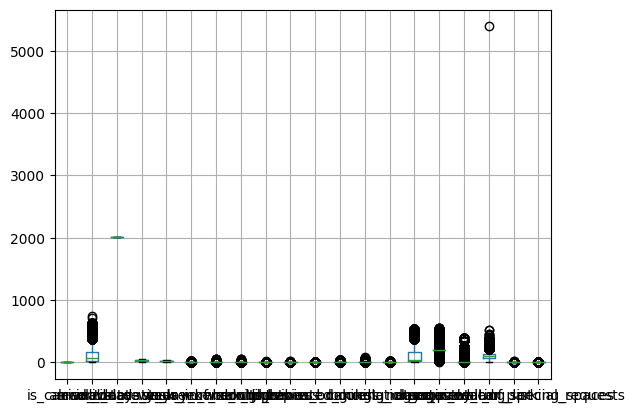

In [282]:
df.boxplot()

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [284]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np

for col in categorical_name:
    if df[col].isnull().any():
      df[col].fillna(df[col].mode(), inplace=True)

    if df[col].nunique() <= 10:
        ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        ohe_data = ohe.fit_transform(df[[col]])
        ohe_df = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out([col]))
        df = pd.concat([df, ohe_df], axis=1)
        df.drop(columns=[col], inplace=True)
    else:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 64 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  country                         119390 non-null  int64  
 12  is_repeated_gues

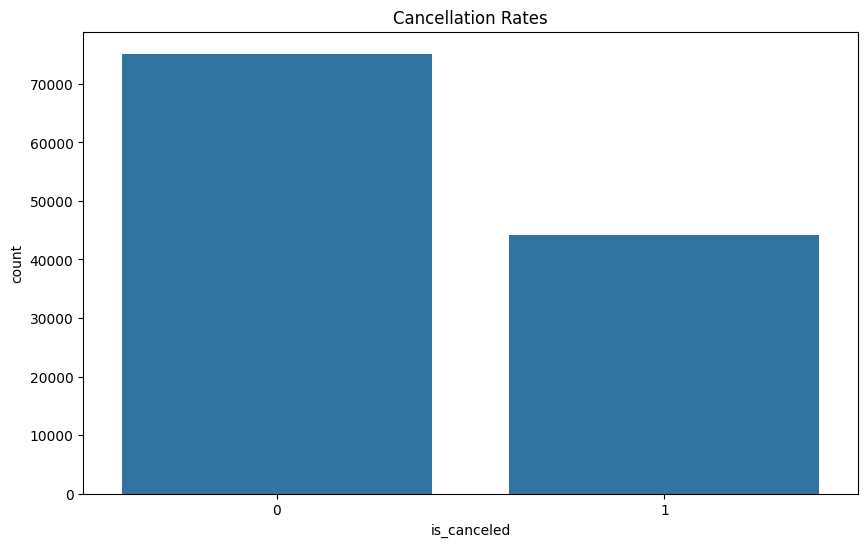

In [285]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_canceled', data=df)
plt.title('Cancellation Rates')
plt.show()

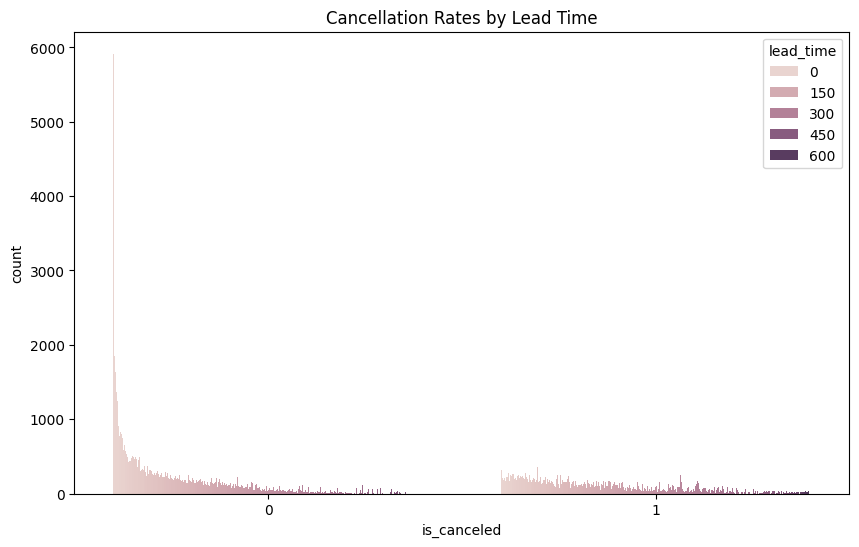

In [286]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_canceled', hue='lead_time', data=df)
plt.title('Cancellation Rates by Lead Time')
plt.show()

**Hypothesis**

In [287]:

# Hypothesis 1: Customers booking more than 6 months in advance are more likely to cancel.

group1 = df[df['lead_time'] <= 180]['is_canceled']
group2 = df[df['lead_time'] > 180]['is_canceled']


# Perform a Chi-Square test
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"Chi-Square test results for Hypothesis 1:")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.3f}")


Chi-Square test results for Hypothesis 1:
t-statistic: -74.64
p-value: 0.000


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 64 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  country                         119390 non-null  int64  
 12  is_repeated_gues

In [289]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
is_canceled,1.000000,0.293123,0.016660,-0.001491,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,...,-0.477911,0.481457,-0.011312,-0.023670,-0.038698,0.133084,-0.124135,0.978435,-1.000000,0.131752
lead_time,0.293123,1.000000,0.040142,0.086228,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,...,-0.380233,0.380179,0.016587,0.068541,-0.031924,-0.173959,0.159548,0.304077,-0.293123,-0.044286
arrival_date_year,0.016660,0.040142,1.000000,-0.251837,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,...,0.065736,-0.065963,-0.000760,-0.171738,-0.010982,0.227954,-0.163588,0.017546,-0.016660,-0.003782
arrival_date_month,-0.001491,0.086228,-0.251837,1.000000,0.302228,-0.017938,-0.031869,-0.025746,-0.058284,-0.082875,...,-0.067347,0.065667,0.017799,0.058880,0.010146,-0.093429,0.071215,0.000085,0.001491,-0.007605
arrival_date_week_number,0.008148,0.126871,-0.540561,0.302228,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,...,-0.005847,0.007773,-0.016888,0.090334,0.011618,-0.079544,0.042213,0.013112,-0.008148,-0.023591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
customer_type_Transient,0.133084,-0.173959,0.227954,-0.093429,-0.079544,-0.000608,0.019485,0.007299,0.091006,0.096135,...,-0.109341,0.115867,-0.053428,-0.326153,-0.120893,1.000000,-0.895595,0.131810,-0.133084,0.009876
customer_type_Transient-Party,-0.124135,0.159548,-0.163588,0.071215,0.042213,0.006269,-0.064920,-0.064281,-0.115760,-0.092846,...,0.114761,-0.121451,0.054654,-0.097061,-0.035977,-0.895595,1.000000,-0.123411,0.124135,-0.006983
reservation_status_Canceled,0.978435,0.304077,0.017546,0.000085,0.013112,-0.009024,-0.005338,0.023657,0.067409,0.004307,...,-0.486775,0.490337,-0.011076,-0.022348,-0.038464,0.131810,-0.123411,1.000000,-0.978435,-0.075845
reservation_status_Check-Out,-1.000000,-0.293123,-0.016660,0.001491,-0.008148,0.006130,0.001791,-0.024765,-0.060017,-0.005048,...,0.477911,-0.481457,0.011312,0.023670,0.038698,-0.133084,0.124135,-0.978435,1.000000,-0.131752


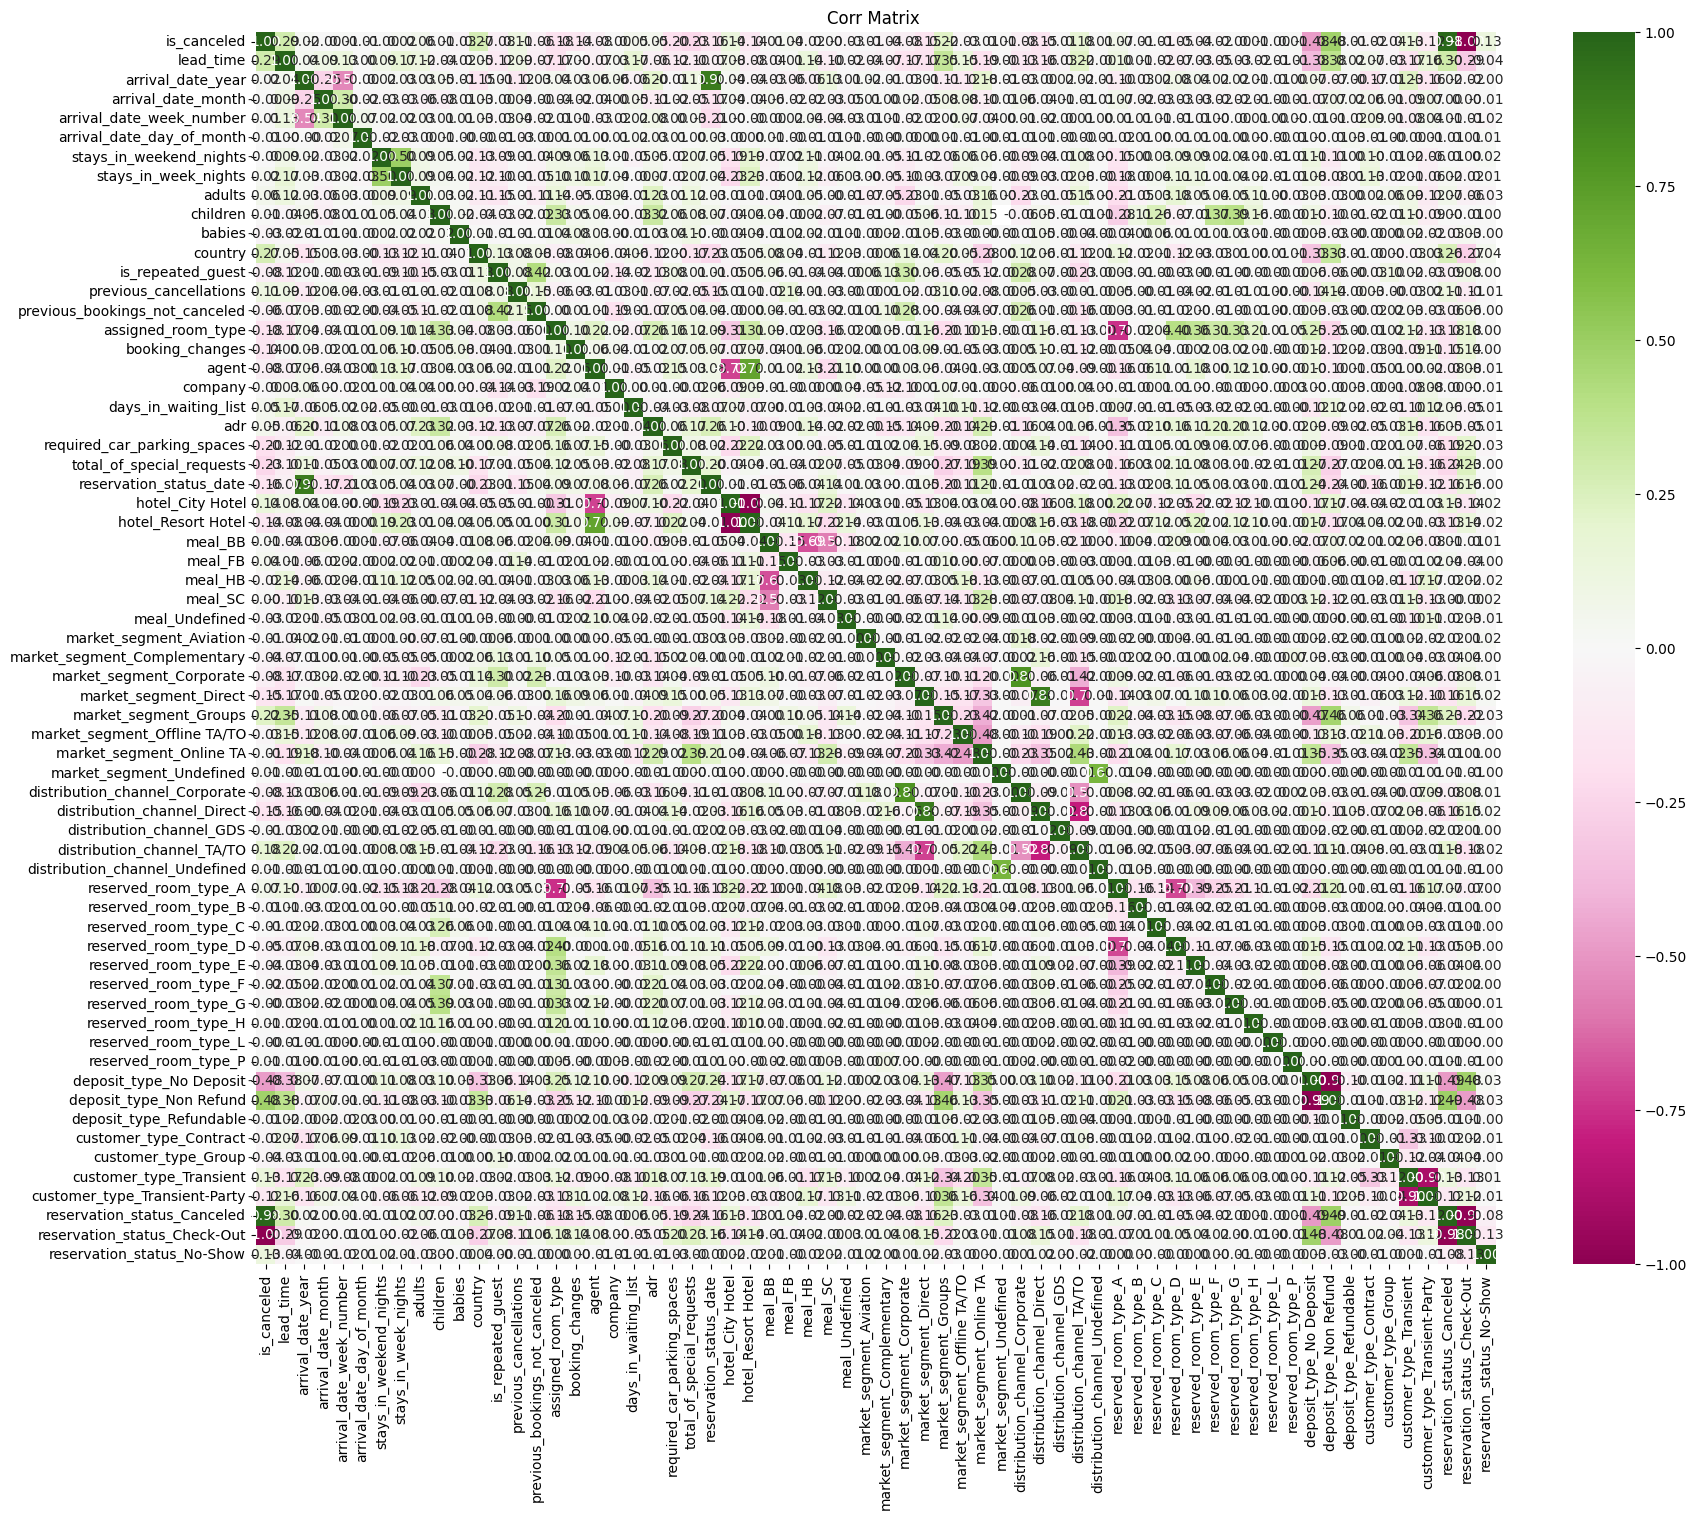

In [290]:
plt.figure(figsize=(20, 16)) # Increased figure size
sns.heatmap(df.corr(), annot=True, cmap='PiYG', fmt=".2f")
plt.title('Corr Matrix ')
plt.show()

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 64 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  country                         119390 non-null  int64  
 12  is_repeated_gues

In [292]:
# Split the data into training and testing sets BEFORE imputation
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [293]:
numerical_cols = X_train.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
X_train[numerical_cols] = imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = imputer.transform(X_test[numerical_cols])

In [294]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

In [295]:
# Train Logistic Regression
logreg = LogisticRegression(solver='liblinear')  # Specify a solver
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

Logistic Regression Accuracy: 0.9982829382695368


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [296]:

# Train Random Forest
rf = RandomForestClassifier(random_state=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 1.0


In [297]:
# prompt: why the accuracy is showing 1.0 in random regression how to get near about random forest is 86.00

from sklearn.model_selection import train_test_split

# ... (Your existing code) ...

# Split the data into training and testing sets BEFORE imputation
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Impute missing values AFTER splitting the data
numerical_cols = X_train.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
X_train[numerical_cols] = imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = imputer.transform(X_test[numerical_cols])

# ... (rest of your code) ...